In [2]:
# import scraping as s
import pandas as pd
import numpy as np
import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB

from sklearn.decomposition import NMF, LatentDirichletAllocation

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

import util as u
import text_processing as tp
%load_ext autoreload
%autoreload 2

In [5]:
# u.pkl_this('Data\rap_lyrics_181106.pkl', text)
# text = u.open_pkl('Data\rap_lyrics_181106.pkl')
text = u.open_pkl('Data/all_lyrics_df_181109.pkl')

In [45]:
X = [x[1] for x in text]
keys = [x[0] for x in text]

### Apply to full dataset

In [263]:
vectorizer = CountVectorizer(ngram_range=(1,2), encoding = 'ISO-8859-1', strip_accents='ascii', min_df = 2, max_df=0.95,
                             stop_words = tp.stop_words())

In [264]:
cvX = vectorizer.fit(X)

/Users/kendra/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:286: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['eramos', 'estabamos', 'estais', 'estan', 'estara', 'estaran', 'estaras', 'estare', 'estareis', 'estaria', 'estariais', 'estariamos', 'estarian', 'estarias', 'esteis', 'esten', 'estes', 'estuvieramos', 'estuviesemos', 'fueramos', 'fuesemos', 'habeis', 'habia', 'habiais', 'habiamos', 'habian', 'habias', 'habra', 'habran', 'habras', 'habre', 'habreis', 'habria', 'habriais', 'habriamos', 'habrian', 'habrias', 'hayais', 'hubieramos', 'hubiesemos', 'mas', 'mia', 'mias', 'mio', 'mios', 'seais', 'sera', 'seran', 'seras', 'sere', 'sereis', 'seria', 'seriais', 'seriamos', 'serian', 'serias', 'si', 'tambien', 'tendra', 'tendran', 'tendras', 'tendre', 'tendreis', 'tendria', 'tendriais', 'tendriamos', 'tendrian', 'tendrias', 'teneis', 'tengais', 'tenia', 'teniais', 'teniamos', 'tenian', 'ten

In [265]:
transX = vectorizer.fit_transform(X)
features = vectorizer.get_feature_names()
len(features)

31656

In [47]:
df = pd.DataFrame(transX.toarray(), columns=features)

In [266]:
word_frequs = np.sum(df)

In [267]:
short_list = word_frequs.sort_values(ascending=False)[:20]
short_list

like      6446
got       4651
yeah      4649
get       4266
know      4015
nigga     2608
go        2534
bitch     2432
fuck      2137
shit      2111
baby      2011
oh        1937
niggas    1922
let       1853
love      1822
make      1778
back      1759
see       1747
cause     1664
wanna     1620
dtype: int64

In [262]:
short_list.index

Index(['like', 'got', 'yeah', 'get', 'know', 'nigga', 'go', 'bitch', 'fuck',
       'shit', 'baby', 'oh', 'niggas', 'let', 'love', 'make', 'back', 'see',
       'cause', 'wanna'],
      dtype='object')

## Tf-Idf

In [ ]:
vect2 = TfidfVectorizer(ngram_range=(1,2), encoding = 'ISO-8859-1', strip_accents='ascii', min_df = 2, max_df=0.95,
                             stop_words = tp.stop_words())

tf_X = vect2.fit_transform(X)

vocab_tfidf = vect2.get_feature_names()

tf_df = pd.DataFrame(tf_X.toarray(), columns=vect2.get_feature_names())

word_tfidfs = np.sum(tf_df)

In [273]:
word_tfidfs.sort_values(ascending=False)[:20]

In [90]:
u.pkl_this('Data\word_frequ_df.pkl', df)

<>:1: DeprecationWarning: invalid escape sequence \w
<>:1: DeprecationWarning: invalid escape sequence \w
<>:1: DeprecationWarning: invalid escape sequence \w
<ipython-input-90-c27ea07a345c>:1: DeprecationWarning: invalid escape sequence \w
  u.pkl_this('Data\word_frequ_df.pkl', df)


### LDA

In [268]:
vocab = vectorizer.get_feature_names()

In [269]:
lda = LatentDirichletAllocation(n_components=10, max_iter=10,
                                learning_method='online',
                                learning_offset=10.,
                                random_state=12)

In [270]:
lda.fit(transX)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=12, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [279]:
np.argsort(lda.components_, axis=1)

(10, 31656)

In [283]:
for topic in range(10):
    print(f"TOPIC {topic}")
    for j in np.argsort(-lda.components_, axis=1)[topic,:12]:
        print(vocab[j])
    print()

TOPIC 0
go
wasted
get
mama
krazy
let
jump
girl
like
go girl
dang
yeaa

TOPIC 1
boom
lie
fly
hangover
ay
boom boom
alright
work
lie lie
ay ay
alright alright
got

TOPIC 2
like
know
get
got
oh
go
love
cause
see
let
girl
baby

TOPIC 3
walk
wit
walk walk
like talk
talk
like
walk like
fu
wicked
bandz
fu fu
make dance

TOPIC 4
low
low low
get low
hit
another round
quan
music
gas pedal
pedal
hit quan
put put
hit flo

TOPIC 5
hol
ooh
bitch
di
woah
bubble
lolli
watch
ass
hol hol
woah woah
ooh ooh

TOPIC 6
yeah
like
got
bitch
nigga
get
fuck
money
niggas
shit
know
go

TOPIC 7
baby baby
nothin
baby
error
ey
bout nothin
bam
worried
worried bout
ey ey
whistle
nothin nothin

TOPIC 8
da
da da
na
na na
still
love
shots
still love
shots shots
love still
errbody
ew

TOPIC 9
boss
oo
boss boss
oo oo
count
yeah
count count
boss yeah
cyclone
yeah boss
like cyclone
baby



### Visualize LDA with pyLDAvis

In [63]:
# import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [122]:
cv_pyldavis_data = pyLDAvis.sklearn.prepare(lda, transX, vectorizer)
pyLDAvis.save_html(cv_pyldavis_data, 'Data/pyLDAvis_CV_LDA-01.html')

In [272]:
pyLDAvis.sklearn.prepare(lda, transX, vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.182244  0.073674       1        1  53.446118
6     -0.237589  0.031193       2        1  35.407240
5     -0.104508 -0.252331       3        1   2.997146
1     -0.016003  0.126547       4        1   2.098980
0      0.054430  0.026780       5        1   1.393395
3      0.082424  0.006997       6        1   1.068253
9      0.034251  0.045650       7        1   1.043926
8      0.117825 -0.041941       8        1   0.913159
7      0.118944 -0.002287       9        1   0.832309
4      0.132470 -0.014282      10        1   0.799473, topic_info=      Category         Freq             Term        Total  loglift  logprob
term                                                                       
15476  Default  6308.000000             like  6308.000000  30.0000  30.0000
10399  Default  2478.000000               go  2478.000000  29.0000  29.0000
1189   Default  2034.000000             baby  2034.000000  28.0000  28.0000
16727  Default  1726.000000             love  1726.000000  27.0000  27.0000
9694   Default  4198.000000              get  4198.000000  26.0000  26.0000
31115  Default  4312.000000             yeah  4312.000000  25.0000  25.0000
2313   Default  2271.000000            bitch  2271.000000  24.0000  24.0000
10111  Default  1539.000000             girl  1539.000000  23.0000  23.0000
15136  Default  1808.000000              let  1808.000000  22.0000  22.0000
26280  Default   817.000000            still   817.000000  21.0000  21.0000
11037  Default  4577.000000              got  4577.000000  20.0000  20.0000
9149   Default  1934.000000             fuck  1934.000000  19.0000  19.0000
20474  Default   869.000000              ooh   869.000000  18.0000  18.0000
12581  Default   842.000000              hit   842.000000  17.0000  17.0000
20138  Default  1794.000000               oh  1794.000000  16.0000  16.0000
29538  Default   384.000000             walk   384.000000  15.0000  15.0000
16889  Default   342.000000              low   342.000000  14.0000  14.0000
8288   Default   853.000000             feel   853.000000  13.0000  13.0000
27105  Default   486.000000             talk   486.000000  12.0000  12.0000
19991  Default   342.000000           nothin   342.000000  11.0000  11.0000
3123   Default   762.000000             bout   762.000000  10.0000  10.0000
5823   Default   318.000000               da   318.000000   9.0000   9.0000
851    Default   900.000000              ass   900.000000   8.0000   8.0000
24644  Default  1971.000000             shit  1971.000000   7.0000   7.0000
17087  Default  1741.000000             make  1741.000000   6.0000   6.0000
4131   Default  1634.000000            cause  1634.000000   5.0000   5.0000
3020   Default   280.000000             boss   280.000000   4.0000   4.0000
28871  Default   431.000000             turn   431.000000   3.0000   3.0000
29042  Default   746.000000               uh   746.000000   2.0000   2.0000
8788   Default   383.000000              fly   383.000000   1.0000   1.0000
...        ...          ...              ...          ...      ...      ...
6823   Topic10     5.594853           dopson     6.700700   4.6486  -6.4689
14871  Topic10     5.588534  larrance dopson     6.706150   4.6467  -6.4700
12833  Topic10     8.781381     holding back    10.544331   4.6460  -6.0181
14870  Topic10     5.562519         larrance     6.728160   4.6387  -6.4746
24393  Topic10    11.954279      sellin dope    14.763798   4.6179  -5.7096
18208  Topic10     9.137183          mmm mmm    11.302304   4.6163  -5.9783
29695  Topic10     2.706161      wanna smash     3.398062   4.6013  -7.1952
16772  Topic10     2.685109        love gave     3.373585   4.6007  -7.2030
16942  Topic10    17.046601             lupe    21.823325   4.5819  -5.3547
6818   Topic10     6.939451      dope sellin     8.887026   4.5816  -6.2535
20866  Topic10     4.782790      party sh

In [65]:
lda_trans = lda.transform(transX)

In [81]:
lda_trans.shape
# could then cluster on these "features"

(1093, 10)

In [89]:
u.pkl_this('Data\lda_trans_doc_df.pkl', lda_trans)

<>:1: DeprecationWarning: invalid escape sequence \l
<>:1: DeprecationWarning: invalid escape sequence \l
<>:1: DeprecationWarning: invalid escape sequence \l
<ipython-input-89-dee34f11c3b0>:1: DeprecationWarning: invalid escape sequence \l
  u.pkl_this('Data\lda_trans_doc_df.pkl', lda_trans)


In [71]:
lda.perplexity(transX)

5242.8593103985304

### Optimal number of components (topics)

In [72]:
n_components = [5,10,15,20]
for n in n_components:
    lda = LatentDirichletAllocation(n_components=n, max_iter=10,
                                    learning_method='online',
                                    learning_offset=10.,
                                    random_state=12)

    lda.fit(transX)
    print(f'Perplexity for n = {n} : {lda.perplexity(transX)}')

Perplexity for n = 5 : 5284.409829767809
Perplexity for n = 10 : 5242.85931039853
Perplexity for n = 15 : 5170.647665495528
Perplexity for n = 20 : 5124.400808824117


In [83]:
import matplotlib.pyplot as plt

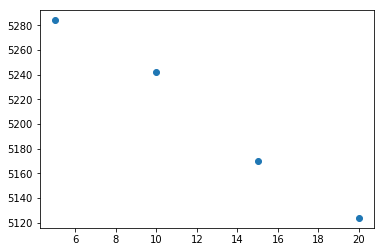

In [84]:
plt.scatter([5,10,15,20], [5284, 5242, 5170, 5124])

*All about thes same?*

#### LDA + TF-IDF

In [75]:
lda = LatentDirichletAllocation(n_components=10, max_iter=10,
                                learning_method='online',
                                learning_offset=10.,
                                random_state=12)

In [85]:
lda2 = lda.fit(tf_X)

TF-IDF LDA: most topics were on top of each other

They are all on top of each other

## LDA in gensim

In [103]:
from gensim import corpora, models, similarities, matutils

/Users/kendra/anaconda3/lib/python3.6/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


**Prep for gensim**

In [104]:
# transpose DTM
dtm_T = transX.transpose()

dtm_T.shape

# Convert sparse matrix of counts to a gensim corpus
corpus = matutils.Sparse2Corpus(dtm_T)

# Map matrix rows to words (tokens)
    # We need to save a mapping (dict) of row id to word (token) for later use by gensim:

id2word = dict((v, k) for k, v in vectorizer.vocabulary_.items())

word2id = vectorizer.vocabulary_

# Create lda model (equivalent to "fit" in sklearn)
lda_gensim = models.LdaModel(corpus=corpus, num_topics=10, minimum_probability=0.03, id2word=id2word, passes=10)

In [113]:
gensim_topics = lda_gensim.print_topics()

In [114]:
gensim_topics

[(0,
  '0.015*"like" + 0.015*"yeah" + 0.011*"got" + 0.009*"baby" + 0.009*"know" + 0.008*"love" + 0.007*"get" + 0.005*"shit" + 0.005*"bitch" + 0.005*"nigga"'),
 (1,
  '0.017*"go" + 0.012*"like" + 0.009*"get" + 0.008*"know" + 0.008*"fuck" + 0.008*"let" + 0.007*"bitch" + 0.007*"yeah" + 0.006*"got" + 0.005*"money"'),
 (2,
  '0.018*"know" + 0.010*"get" + 0.009*"got" + 0.008*"gotta" + 0.007*"like" + 0.007*"fuck" + 0.006*"bitch" + 0.006*"yeah" + 0.005*"nigga" + 0.005*"baby"'),
 (3,
  '0.010*"bitch" + 0.009*"got" + 0.009*"get" + 0.007*"way" + 0.006*"like" + 0.006*"love" + 0.006*"na" + 0.006*"yeah" + 0.005*"go" + 0.005*"back"'),
 (4,
  '0.016*"like" + 0.015*"oh" + 0.009*"get" + 0.009*"know" + 0.008*"oh oh" + 0.008*"got" + 0.008*"one" + 0.007*"yeah" + 0.005*"never" + 0.005*"niggas"'),
 (5,
  '0.012*"la" + 0.011*"like" + 0.010*"nigga" + 0.010*"get" + 0.009*"got" + 0.009*"la la" + 0.006*"money" + 0.006*"yeah" + 0.006*"niggas" + 0.005*"bitch"'),
 (6,
  '0.015*"yeah" + 0.011*"get" + 0.009*"go" + 0.0

In [115]:
import pyLDAvis.gensim

In [145]:
dictionary = corpora.Dictionary(word2id)

TypeError: doc2bow expects an array of unicode tokens on input, not a single string

In [136]:
len(X)

1093

In [ ]:
# need to create a gensim Dictionary to use pyLDAvis

In [148]:
from gensim.corpora.dictionary import Dictionary

In [150]:
dictionary = Dictionary.from_corpus(corpus,id2word=id2word)

In [261]:
pyLDAvis.gensim.prepare(lda_gensim, corpus, dictionary)

/Users/kendra/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.017909  0.013424       1        1  16.749086
9      0.006270  0.007037       2        1  16.229744
4      0.023280  0.011713       3        1  12.757357
7      0.026666  0.020844       4        1  12.008915
2      0.019137  0.017522       5        1  11.958674
5      0.033131  0.012974       6        1   9.840473
6      0.018991  0.059588       7        1   6.965751
1      0.029138  0.023916       8        1   6.358960
3      0.024654 -0.165182       9        1   4.774635
8     -0.199175 -0.001836      10        1   2.356404, topic_info=      Category         Freq             Term        Total  loglift  logprob
term                                                                       
976    Default   683.000000               la   683.000000  30.0000  30.0000
313    Default  2352.000000               go  2352.000000  29.0000  29.0000
13900  Default   427.000000            la la   427.000000  28.0000  28.0000
225    Default  4354.000000             yeah  4354.000000  27.0000  27.0000
15     Default  1828.000000               oh  1828.000000  26.0000  26.0000
183    Default   604.000000            oh oh   604.000000  25.0000  25.0000
328    Default  2431.000000            nigga  2431.000000  24.0000  24.0000
778    Default   186.000000             boom   186.000000  23.0000  23.0000
602    Default  2265.000000            bitch  2265.000000  22.0000  22.0000
776    Default   928.000000              ooh   928.000000  21.0000  21.0000
1891   Default   141.000000          versace   141.000000  20.0000  20.0000
14950  Default   142.000000              wop   142.000000  19.0000  19.0000
11301  Default   237.000000              hol   237.000000  18.0000  18.0000
35     Default  3769.000000             know  3769.000000  17.0000  17.0000
28     Default  1726.000000              let  1726.000000  16.0000  16.0000
270    Default  1999.000000             fuck  1999.000000  15.0000  15.0000
149    Default  3994.000000              get  3994.000000  14.0000  14.0000
16668  Default   112.000000  versace versace   112.000000  13.0000  13.0000
156    Default   935.000000             life   935.000000  12.0000  12.0000
143    Default  6066.000000             like  6066.000000  11.0000  11.0000
755    Default   362.000000              fly   362.000000  10.0000  10.0000
1487   Default   294.000000          ooh ooh   294.000000   9.0000   9.0000
7      Default  1711.000000             love  1711.000000   8.0000   8.0000
8679   Default   164.000000               na   164.000000   7.0000   7.0000
1128   Default  1134.000000              man  1134.000000   6.0000   6.0000
1457   Default   406.000000            party   406.000000   5.0000   5.0000
1153   Default  1204.000000              way  1204.000000   4.0000   4.0000
59     Default  1980.000000             shit  1980.000000   3.0000   3.0000
2704   Default   302.000000              lie   302.000000   2.0000   2.0000
394    Default   841.000000        yeah yeah   841.000000   1.0000   1.0000
...        ...          ...              ...          ...      ...      ...
7162   Topic10    13.067389              bee    20.812416   3.2826  -6.7138
6384   Topic10    13.775208      shine shine    22.517101   3.2566  -6.6610
9090   Topic10    27.553652               ye    74.302185   2.7560  -5.9678
3709   Topic10    29.330690             week    93.777802   2.5857  -5.9053
2337   Topic10    17.076660             mask    35.004158   3.0303  -6.4462
755    Topic10    50.796936              fly   362.651764   1.7824  -5.3561
1856   Topic10    33.675484            nicki   173.856995   2.1066  -5.7671
328    Topic10    97.159813            nigga  2431.564453   0.5281  -4.7076
1857   Topic10    29.181255            minaj   129.577103   2.2573  -5.9104
1917   Topic10    29.095831      nicki minaj   128.648651   2.2615  -5.9133
1570   Topic10    21.192360             b

In [152]:
gs_pyldavis_data = pyLDAvis.gensim.prepare(lda_gensim, corpus, dictionary)
pyLDAvis.save_html(gs_pyldavis_data, 'Data\pyLDAvis_gs_LDA-01.html')

<>:2: DeprecationWarning: invalid escape sequence \p
<>:2: DeprecationWarning: invalid escape sequence \p
<>:2: DeprecationWarning: invalid escape sequence \p
<ipython-input-152-6b93f3677878>:2: DeprecationWarning: invalid escape sequence \p
  pyLDAvis.save_html(gs_pyldavis_data, 'Data\pyLDAvis_gs_LDA-01.html')
/Users/kendra/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [153]:
lda_gensim.log_perplexity(corpus)

-8.5736006767965343

Lower perplexity is better